In [1]:
from tensorflow.keras.models import load_model
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

In [2]:


model = load_model("detect_kidney_stone.keras")

C:\Users\sarav\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 10 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [4]:

def preprocess_image(image_path):
    try:

        original_img = cv2.imread(image_path)
        if original_img is None:
            print(f"Error: Unable to load image at {image_path}")
            return None, None

        
        img = cv2.resize(original_img, (224, 224)) 
        img = img / 255.0  
        img = np.expand_dims(img, axis=0)  
        return img, original_img
    except Exception as e:
        print(f"Error during preprocessing: {e}")
        return None, None


def predict_and_show_image(image_path):
    img, original_img = preprocess_image(image_path)
    
    if img is not None:
        prediction = model.predict(img)[0][0]  
        label = "Kidney Stone Detected" if prediction > 0.5 else "Normal"
        confidence = prediction if prediction > 0.5 else 1 - prediction

       
        plt.figure(figsize=(6, 6))
        plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
        plt.title(f"{label} (Confidence: {confidence:.2f})", fontsize=14, color="red" if prediction > 0.5 else "green")
        plt.axis("off")
        plt.show()

        print(f"\nPrediction for {image_path}: {label} (Confidence: {confidence:.2f})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 602ms/step


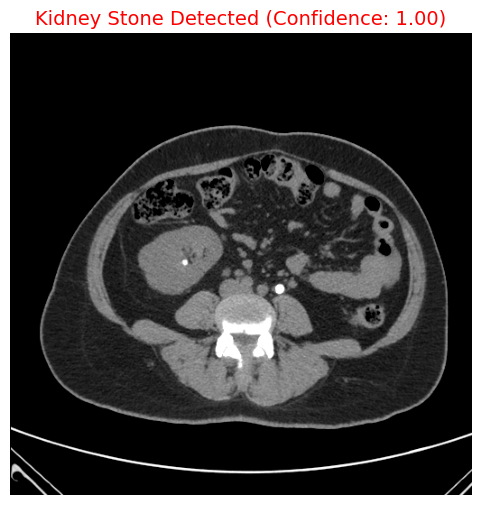


Prediction for D:\back up-Main project\Kidney-Stone-Normal-images\Combined_CT_SCANS\Stone- (519).jpg: Kidney Stone Detected (Confidence: 1.00)


In [ ]:

image_path = "D:\back up-Main project\Kidney-Stone-Normal-images\dataset\test\Stone\Stone- (160).jpg"
predict_and_show_image(image_path)